<a href="https://colab.research.google.com/github/pszwed-ai/lab-eksploracja-danych/blob/main/Klasyfikacja_gatunk%C3%B3w_muzyki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja gatunków muzyki
## Łukasz Kochańczyk, gr. 1
Celem laboratorium jest przeprowadzenie klasyfikacji gatunków muzyki na podstawie wyodrębnionych cech.
* Zastosujemy skalowanie cech 
* Porównamy kilka klasyfikatorów
* Zastosujemy ciąg przetwarzania (*pipeline*)



## 10.1. Pobieramy i wczytujemy dane

In [1]:
!wget https://dysk.agh.edu.pl/s/foAZjcKxtX2TQj5/download -O gitzan_small_features.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('gitzan_small_features.csv').drop(columns = ['Unnamed: 0'])
df.head()

,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var,rms_mean,rms_var,...,chroma08_var,chroma09_mean,chroma09_var,chroma10_mean,chroma10_var,chroma11_mean,chroma11_var,chroma12_mean,chroma12_var,tempo
0,jazz,jazz.00007.wav,[-0.02368164 -0.0335083 -0.02297974 ... -0.09...,22050,0.064916,0.016395,1175.218609,25381.964957,0.093287,0.000518,...,0.050465,0.111901,0.052474,0.152322,0.045983,0.335170,0.171622,0.166403,0.055145,99.384014
1,jazz,jazz.00005.wav,[ 0.06652832 0.16467285 0.2319336 ... 0.00...,22050,0.057980,0.014359,1275.544550,132877.806467,0.106932,0.000414,...,0.075667,0.403985,0.157967,0.285059,0.077838,0.293305,0.122505,0.296452,0.102409,107.666016
2,jazz,jazz.00003.wav,[ 0.0295105 0.04818726 0.04190063 ... -0.02...,22050,0.044694,0.010488,817.025606,70047.373030,0.059116,0.000782,...,0.024396,0.283093,0.089166,0.223196,0.030830,0.369777,0.087368,0.394549,0.106700,123.046875
3,jazz,jazz.00006.wav,[0.08334351 0.14605713 0.14706421 ... 0.008514...,22050,0.048092,0.013442,1223.031342,86273.941069,0.098039,0.000175,...,0.056039,0.209229,0.076246,0.215152,0.067818,0.310599,0.107516,0.322208,0.129514,135.999178
4,jazz,jazz.00008.wav,[0.05685425 0.07565308 0.0402832 ... 0.038330...,22050,0.046328,0.014309,1306.914285,25038.420549,0.117847,0.000247,...,0.091059,0.302256,0.059919,0.318650,0.067748,0.459829,0.116215,0.367748,0.071250,107.666016


Oprócz wyznaczonych cech zbiór danych zawiera oryginalne surowe dane i ich etykiety

In [4]:
df.columns

Index(['genre', 'file', 'audio', 'sr', 'zero_crossing_rate_mean',
       'zero_crossing_rate_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'rms_mean', 'rms_var', 'spectral_rolloff_mean',
       'spectral_rolloff_var', 'mfcc01_mean', 'mfcc01_var', 'mfcc02_mean',
       'mfcc02_var', 'mfcc03_mean', 'mfcc03_var', 'mfcc04_mean', 'mfcc04_var',
       'mfcc05_mean', 'mfcc05_var', 'mfcc06_mean', 'mfcc06_var', 'mfcc07_mean',
       'mfcc07_var', 'mfcc08_mean', 'mfcc08_var', 'mfcc09_mean', 'mfcc09_var',
       'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean',
       'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
       'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean',
       'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',
       'mfcc20_mean', 'mfcc20_var', 'chroma01_mean', 'chroma01_var',
       'chroma02_mean', 'chroma02_var', 'chroma03_mean', 'chroma03_var',
       'chroma04_mean'

**TODO 10.1.1**
* Usuń zbędne kolumny z DataFrame (te które nie są wyznaczonymi cechami)
* Przekonwertuj do postaci macierzy ```numpy``` za pomocą metody ```to_numpy()```

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler

# wyznaczanie etykiet w postci liczbowej
labels = df['genre']
le = LabelEncoder()
y = le.fit_transform(labels)

print(y)
print(le.classes_)

#usuwanie zbędnych kolumn
X = df.drop(columns=['genre', 'file', 'audio', 'sr']).to_numpy()
print(X.shape)

[5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 7 7 7 7 7 7 7 7 7 7 1 1 1 1 1 1 1
 1 1 1 9 9 9 9 9 9 9 9 9 9 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 8 8 8 8 8 8 8 8 8 8]
['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
(100, 73)


## 10.2. Klasyfikacja

**10.2.1 TODO**
* Zastosuj klasyfikator ```GaussianNB``` i wyznacz przewidywane przez klasyfikator etykiety ```y_pred``` za pomocą funkcji ```cross_val_predict()``` z parametrem ```cv=10```
* Wyznacz macierz pomyłek za pomocą funkcji ```confusion_matrix()```, a następnie wydrukuj ją 

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

clf = GaussianNB()

y_pred = cross_val_predict(clf, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[4 0 0 0 0 0 0 0 2 4]
 [0 9 0 0 0 1 0 0 0 0]
 [0 0 8 0 0 0 1 1 0 0]
 [0 0 0 9 0 0 0 1 0 0]
 [1 0 0 0 6 0 1 1 1 0]
 [3 0 0 0 0 7 0 0 0 0]
 [0 0 1 2 0 0 7 0 0 0]
 [1 0 1 3 2 1 0 2 0 0]
 [1 0 0 0 1 0 0 0 7 1]
 [1 0 0 0 0 0 1 0 0 8]]


Zilustrujemy macierz pomyłek wraz z etykietami

In [7]:
# Funkcja pobrana z https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(
    cf, group_names=None, categories='auto', count=True, percent=True, cbar=True,
    xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None
):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

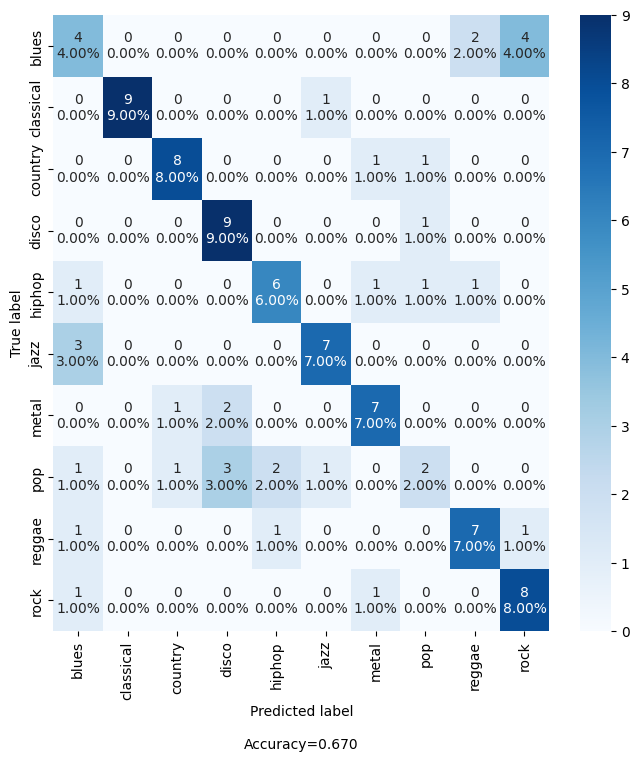

In [8]:
plt.rcParams["figure.figsize"] = (8, 8)
make_confusion_matrix(conf_mat, categories=le.classes_)

### 10.2.1 Skalowanie

Zastosujemy skalowanie cech:
* StandardScaler 
* MinMaxScaler 

**TODO 10.2.2**
* Jak przekształca dane StandardScaler?
* Co robi MinMaxScaler? 
* Który z nich może zwrócić dane ujemne?

**StandardScaler** przekształca dane poprzez skalowanie ich do jednostkowej wariancji i przesunięcie do zera średniej.
**MinMaxScaler** przekształca dane poprzez skalowanie ich do zadanego zakresu, domyślnie od 0 do 1.
**StandardScaler** może zwrócić wartości ujemne.

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = np.asarray(
    [[100, 0.001],
	[8, 0.05],
	[50, 0.005],
	[88, 0.07],
	[4, 0.1]]
)

print("Przed skalowaniem")
print(data, end='\n\n')
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print("Po skalowaniu")
print(scaled, end='\n\n')

print(f'scaler.mean_={scaler.mean_}')
print(f'scaler.var_={scaler.var_}')

print(f'data.mean(axis=0)={data.mean(axis=0)}')
print(f'data.std(axis=0)**2={data.std(axis=0)**2}')

print(f'scaled.mean(axis=0)={scaled.mean(axis=0)}')
print(f'scaled.std(axis=0)**2={scaled.std(axis=0)**2}')

Przed skalowaniem
[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]

Po skalowaniu
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]

scaler.mean_=[5.00e+01 4.52e-02]
scaler.var_=[1.56480e+03 1.44216e-03]
data.mean(axis=0)=[5.00e+01 4.52e-02]
data.std(axis=0)**2=[1.56480e+03 1.44216e-03]
scaled.mean(axis=0)=[ 4.4408921e-17 -4.4408921e-17]
scaled.std(axis=0)**2=[1. 1.]


In [10]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print("Po skalowaniu")
print(scaled)

Po skalowaniu
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


Zobaczmy na wyniki po skalowaniu

**TODO 10.2.3**
* Przeprowadź skalowanie i klasyfikację używając przeskalowanych cech
* Wyznacz przewidywane etykiety za pomocą ```cross_val_predict(..., cv=10)```
* Narysuj macierz pomyłek
* Czy skalowanie miało jakiś wpływ na wyniki?

Tak, skalowanie **miało wpływ** na wyniki ponieważ uzyskaliśmy nieco lepszą skuteczność i możemy zauważyć różnice w macierzy pomyłek.

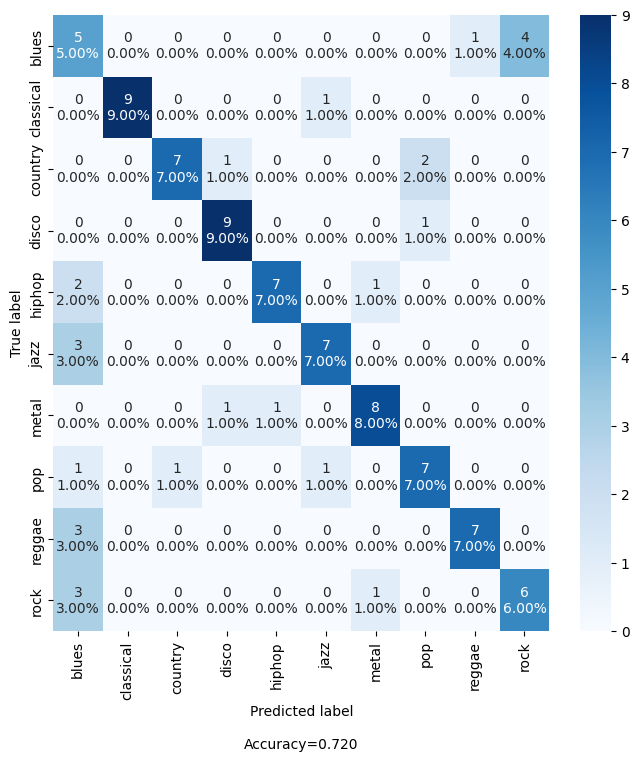

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
clf = GaussianNB()

y_pred = cross_val_predict(clf, X_scaled, y, cv=10)
conf_mat = confusion_matrix(y, y_pred) 

plt.rcParams["figure.figsize"] = (8, 8)
make_confusion_matrix(conf_mat, categories=le.classes_)

### 10.2.2 Budujemy ciąg przetwarzania (pipeline)

In [12]:
from sklearn.pipeline import make_pipeline

scl = StandardScaler()
clf = GaussianNB()

pipeline = make_pipeline(scl, clf)
print(pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])


Pipeline ma typowe metody klasyfikatora: ```fit()``` i ```predict()```

In [13]:
import sklearn

pipeline.fit(X, y)
y_pred = pipeline.predict(X)
print(f'Accuracy: {sklearn.metrics.accuracy_score(y, y_pred)}')

Accuracy: 0.92


Oczywiście jest to wynik wyznaczony dla całego zbioru danych. W przypadku podziału na zbiór uczący/testowy rezultat będzie gorszy.

**Powinniśmy zastosować określić parametry sklaowania na podstawie zbioru uczącego, a następnie  zastosować je przy transformacji danych zbioru testowego.**

### 10.2.3 Jak wygląda transformacja nieznanych danych?
**TODO**
* Sprawdź, czy mieszczą się w zakresie dla danych uczących. Pamiętaj, że skalujemy cechy, czyli dane w kolumnach

In [14]:
data = np.asarray(
    [[100, 0.001],
	[8, 0.05],
	[50, 0.005],
	[88, 0.07],
	[4, 0.1]]
)
# scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=[0,1])
scaler.fit(data)

# print(data)
unobserved_data = np.asarray([[110, -0.1], [-4, 0.12]])
scaled = scaler.transform(unobserved_data)
print(unobserved_data)
print(scaled)

[[ 1.1e+02 -1.0e-01]
 [-4.0e+00  1.2e-01]]
[[ 1.51677734 -3.82348943]
 [-1.36509961  1.96967637]]


Testujemy trafność (accuracy) dla różnych losowych podziałów

In [15]:
from sklearn.model_selection import train_test_split
import sklearn

for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  print(f'Accuracy:{sklearn.metrics.accuracy_score(y_test,y_pred)}')

Accuracy:0.9
Accuracy:0.7
Accuracy:0.6
Accuracy:0.8
Accuracy:0.9
Accuracy:0.8
Accuracy:0.7
Accuracy:0.8
Accuracy:0.6
Accuracy:0.7
Accuracy:0.6
Accuracy:0.6
Accuracy:0.7
Accuracy:0.6
Accuracy:0.6
Accuracy:0.7
Accuracy:0.7
Accuracy:0.4
Accuracy:0.7
Accuracy:0.9


**TODO 10.2.4**
* Analogicznie wywołaj ```cross_val_predict()``` zastępując klasyfikator zdefiniowanym ciągiem przetwarzania ```pipeline```
* Następnie, wyświetl macierz pomyłek

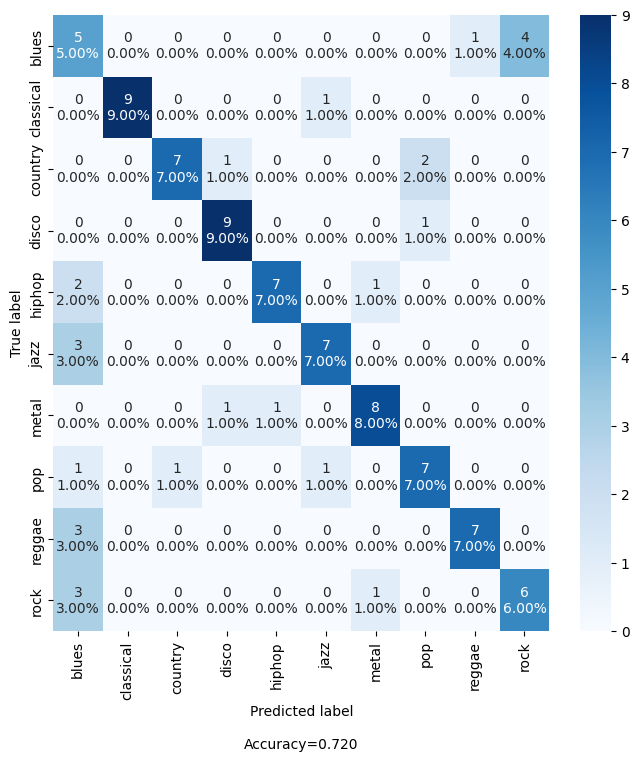

In [16]:
y_pred = cross_val_predict(pipeline, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

plt.rcParams["figure.figsize"] = (8, 8)
make_confusion_matrix(conf_mat, categories=le.classes_)

### 10.2.4 Zbieramy metryki

Zobaczmy jakie są zdefiniowane...

In [17]:
import sklearn

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

# **TODO 10.2.5**
* Zbierz następujące metryki: accuracy, precision, recall i F1 (trzy ostatnie w wersji makro) stosując walidację krzyzową 
* Wyznacz wartości średnie

In [18]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=1),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=1),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=1)
}
           
cv_results = cross_validate(pipeline, X, y, cv=10, scoring=scoring)
print(cv_results)

{'fit_time': array([0.00399685, 0.00298786, 0.00299215, 0.00430083, 0.00200057,
       0.00400066, 0.00299668, 0.00553632, 0.00299931, 0.00200415]), 'score_time': array([0.00555253, 0.00655866, 0.00353336, 0.00354314, 0.00653744,
       0.00455213, 0.01718068, 0.00457287, 0.00454164, 0.00556421]), 'test_accuracy': array([0.8, 0.6, 0.6, 0.7, 0.7, 0.8, 0.9, 0.7, 0.7, 0.7]), 'test_precision_macro': array([0.9       , 0.78333333, 0.8       , 0.75      , 0.925     ,
       0.9       , 0.95      , 0.85      , 0.85      , 0.8       ]), 'test_recall_macro': array([0.8, 0.6, 0.6, 0.7, 0.7, 0.8, 0.9, 0.7, 0.7, 0.7]), 'test_f1_macro': array([0.73333333, 0.51666667, 0.53333333, 0.66666667, 0.64      ,
       0.73333333, 0.86666667, 0.6       , 0.6       , 0.63333333])}


In [19]:
import numpy as np

acc = np.mean(cv_results['test_accuracy'])
prec = np.mean(cv_results['test_precision_macro'])
recall = np.mean(cv_results['test_recall_macro'])
f1 = np.mean(cv_results['test_f1_macro'])

print(f'acc={acc:.2f} prec={prec:.2f} recall={recall:.2f} f1={f1:.2f}')

acc=0.72 prec=0.85 recall=0.72 f1=0.65


## 10.3. Testy wielu klasyfikatorów

Dodamy funkcję, która zbuduje pipeline, wywoła cross_val_predict(), wyznaczy i wyświetli macierz pomyłek.

**TODO 10.3.1.**
* Uzupełnij brakujący kod

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


plt.rcParams["figure.figsize"] = (8, 8)

def cv_show_confusion_matrix(X, y, labels, scaler, classifier, cv=10, title=None):
  pipeline = make_pipeline(scaler, classifier)
  y_pred = cross_val_predict(pipeline, X, y, cv=cv)
  conf_mat = confusion_matrix(y, y_pred)
  
  if not title:
    title = scaler.__class__.__name__ + " + " + classifier.__class__.__name__ 
  else:
    title = title + ': ' + scaler.__class__.__name__ + " + " + classifier.__class__.__name__

  make_confusion_matrix(conf_mat, categories=labels, title=title)

Sprawdzimy, czy działa dla MultinomialMB. Użyjemy parametru ```feature_range=[1,2]```, aby przypadkowo nie dostarczać do ```MultinomialNB``` wartości ujemnych. W nowszej wersji biblioteki jest parametr ```clip``` (przytnij do zakresu).

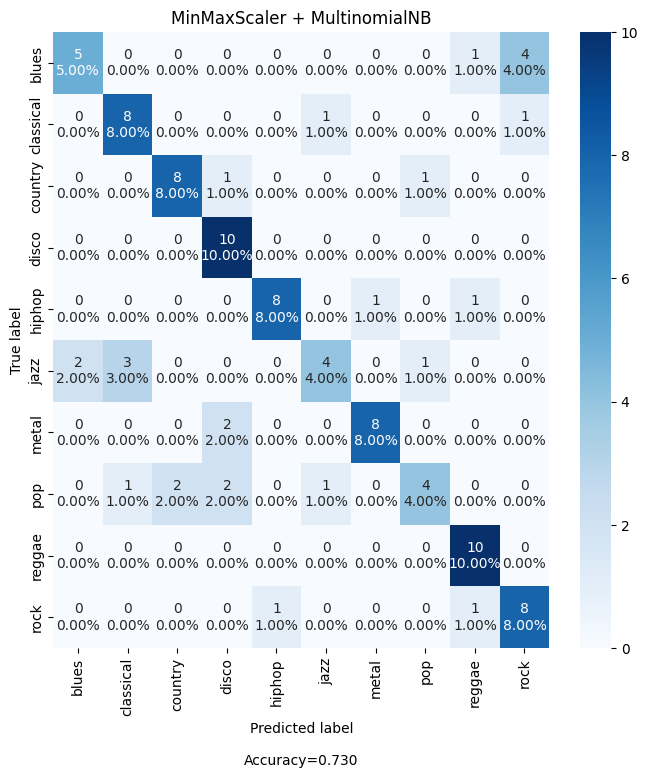

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

cv_show_confusion_matrix(X, y, labels=le.classes_, scaler=MinMaxScaler(feature_range=(1, 2)), classifier=MultinomialNB(alpha=0.1))

### 10.3.1 Tworzymy listę konfiguracji i wyświetlamy macierze pomyłek

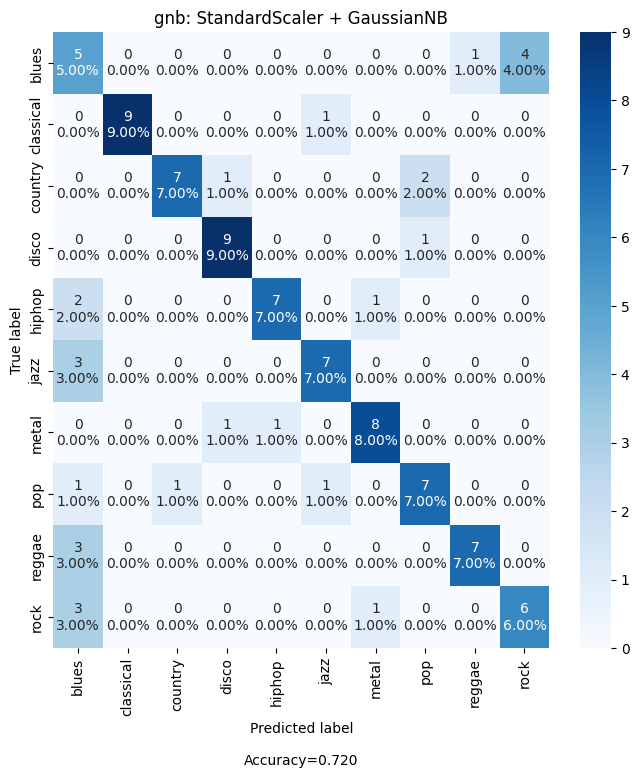

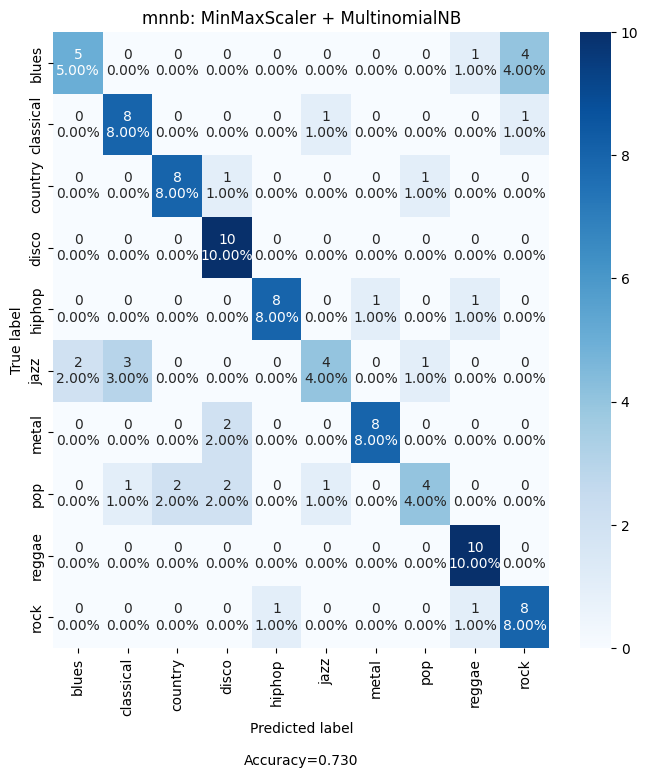

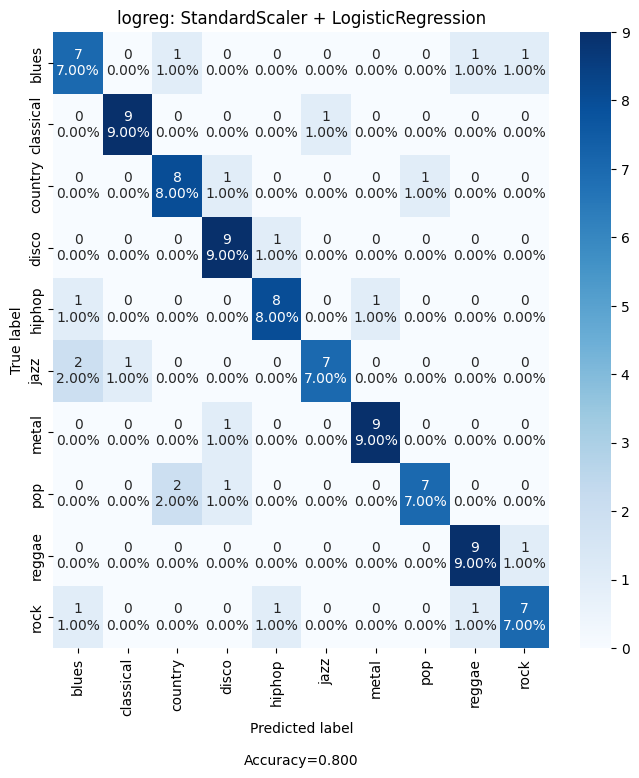

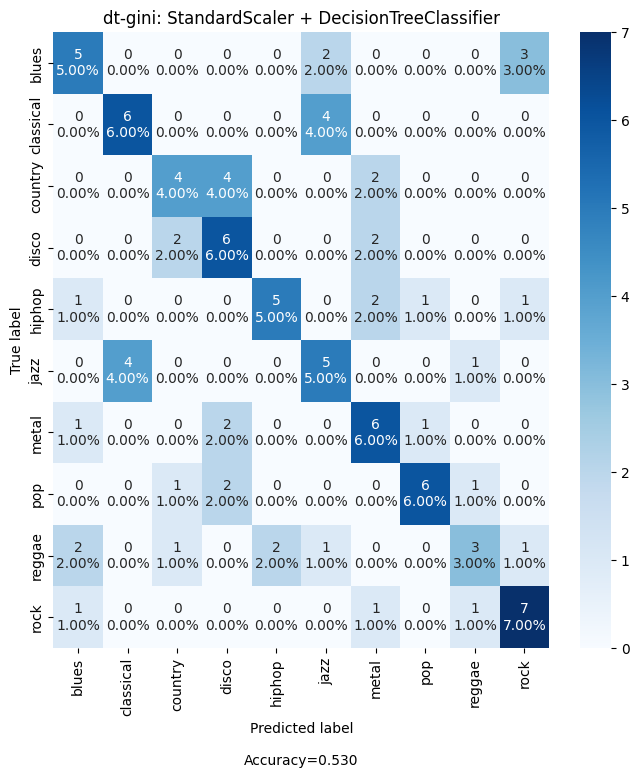

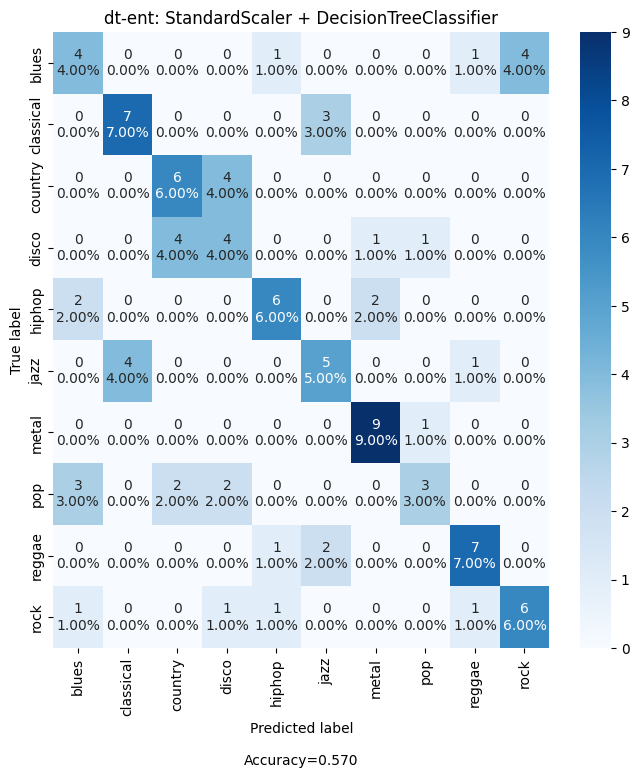

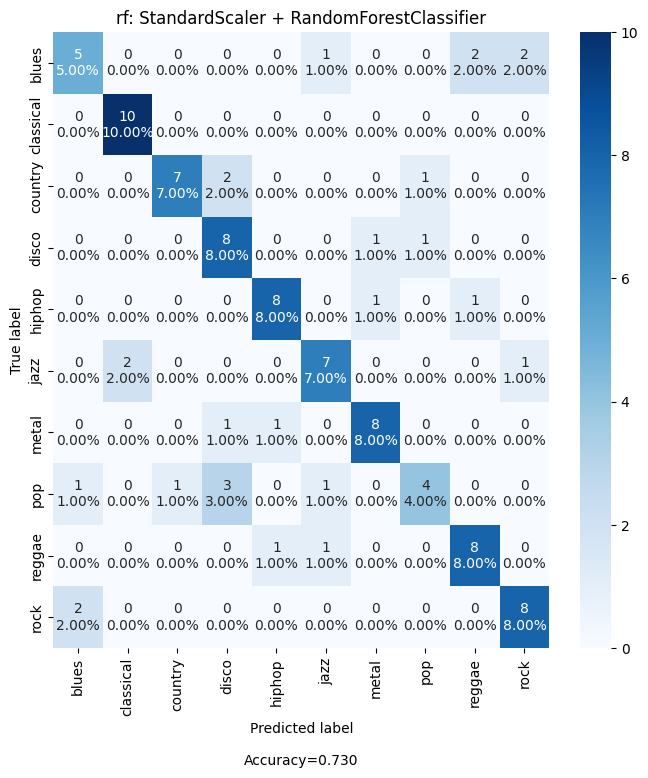

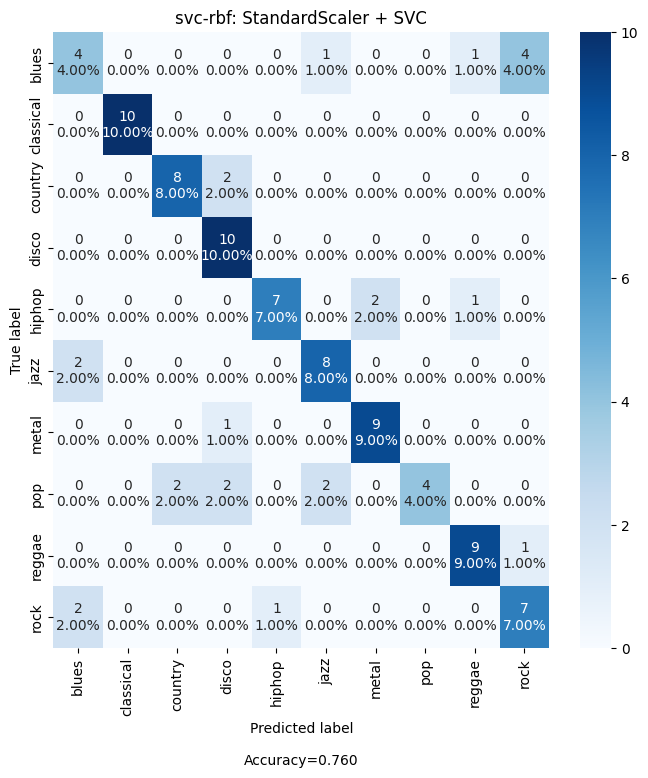

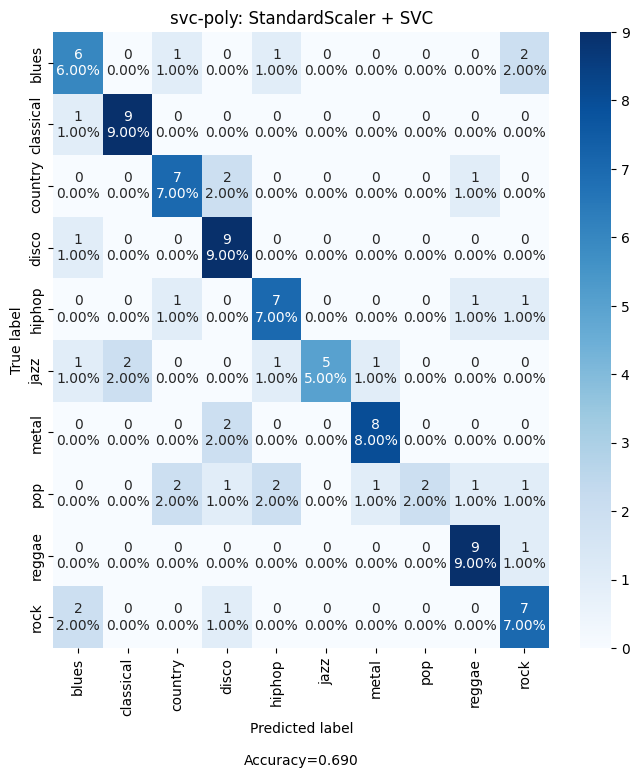

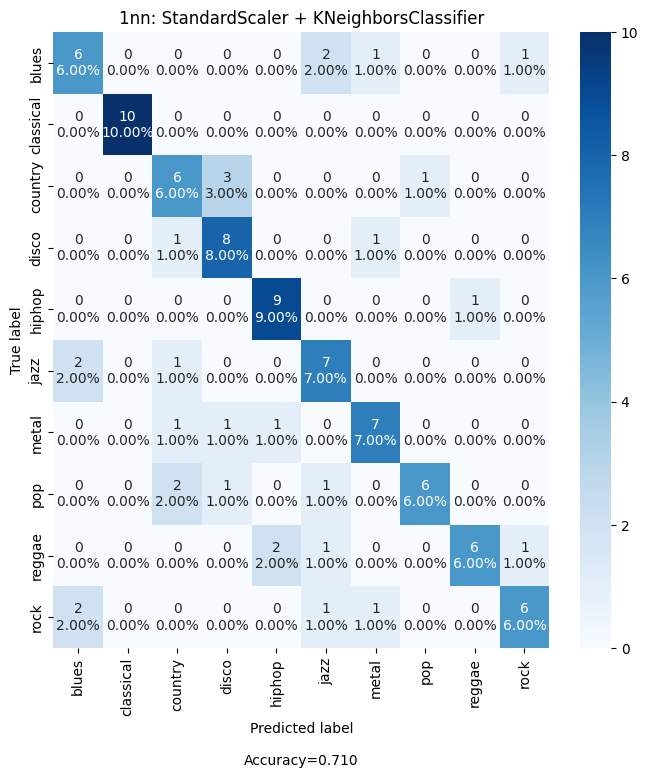

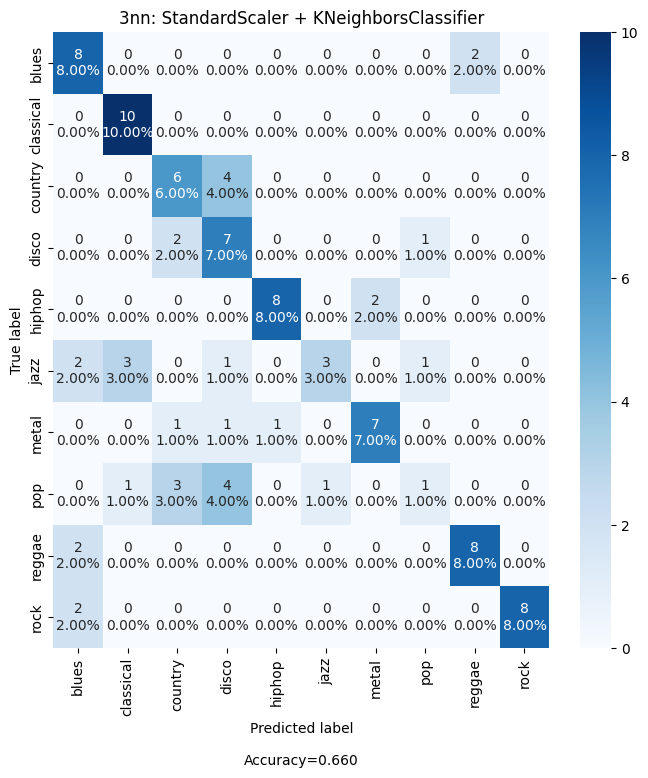

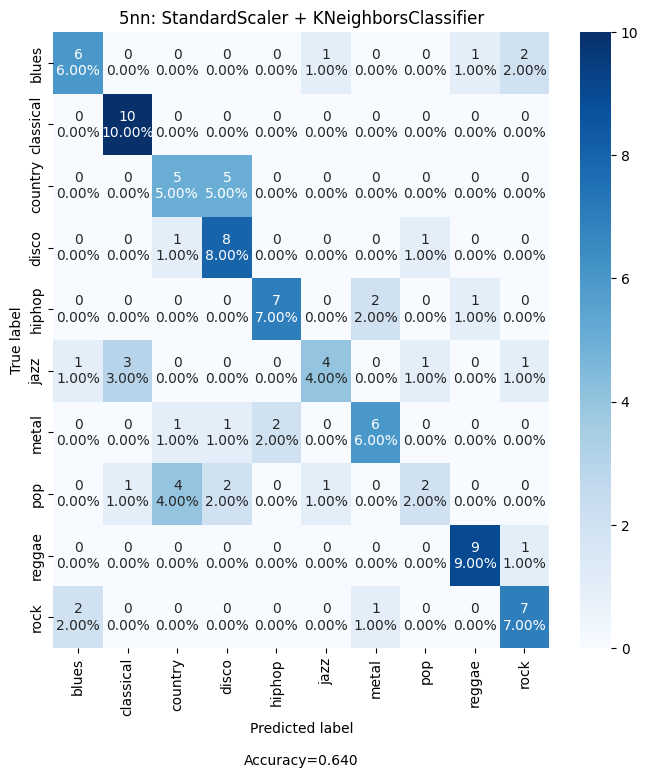

In [22]:
# Szukamy klasyfikatora
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

configs = {
  'gnb': [StandardScaler(), GaussianNB()],
  'mnnb': [MinMaxScaler(feature_range=(1, 2)), MultinomialNB(alpha=0.1)],
  'logreg': [StandardScaler(), LogisticRegression()],
  'dt-gini': [StandardScaler(), DecisionTreeClassifier(criterion='gini')],
  'dt-ent': [StandardScaler(), DecisionTreeClassifier(criterion='entropy')],
  'rf': [StandardScaler(), RandomForestClassifier(criterion='entropy')],
  'svc-rbf': [StandardScaler(), SVC()],
  'svc-poly': [StandardScaler(), SVC(kernel='poly',degree=2,C=1e5)],
  '1nn': [StandardScaler(), KNeighborsClassifier(n_neighbors=1)],
  '3nn': [StandardScaler(), KNeighborsClassifier(n_neighbors=3)],
  '5nn': [StandardScaler(), KNeighborsClassifier(n_neighbors=5)],
}

for k in configs:
  cv_show_confusion_matrix(X, y, labels=le.classes_, scaler=configs[k][0], classifier=configs[k][1], title=k)

### 10.3.2 Testujemy wszystkie klasyfikatory stosując walidację krzyżową

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.utils import Bunch
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

results = Bunch()
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=1),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=1),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=1)
}

for k in configs:
  pipeline = make_pipeline(configs[k][0], configs[k][1])
  results[k] = cross_validate(pipeline, X, y, cv=10, scoring=scoring)

Tym razem results jest słownikiem, który nazwie konfiguracji przypisuje wyniki walidacji krzyżowej. A wyniki to odwzorowanie metryka->lista rezultatów.

In [24]:
# print(results)
for k in results:
  print(k)
  print(results[k])

rdf = pd.DataFrame(results)
rdf.head(10)

gnb
{'fit_time': array([0.00550151, 0.00355053, 0.0055604 , 0.00301266, 0.00104833,
       0.00200081, 0.00500393, 0.00201201, 0.00455379, 0.00099993]), 'score_time': array([0.00603056, 0.00653601, 0.00754666, 0.0065341 , 0.00296211,
       0.004529  , 0.00453734, 0.00399709, 0.00299048, 0.00453401]), 'test_accuracy': array([0.8, 0.6, 0.6, 0.7, 0.7, 0.8, 0.9, 0.7, 0.7, 0.7]), 'test_precision_macro': array([0.9       , 0.78333333, 0.8       , 0.75      , 0.925     ,
       0.9       , 0.95      , 0.85      , 0.85      , 0.8       ]), 'test_recall_macro': array([0.8, 0.6, 0.6, 0.7, 0.7, 0.8, 0.9, 0.7, 0.7, 0.7]), 'test_f1_macro': array([0.73333333, 0.51666667, 0.53333333, 0.66666667, 0.64      ,
       0.73333333, 0.86666667, 0.6       , 0.6       , 0.63333333])}
mnnb
{'fit_time': array([0.00100017, 0.00203705, 0.00200534, 0.00201607, 0.00101542,
       0.00099993, 0.00303149, 0.00151324, 0.00100112, 0.00199866]), 'score_time': array([0.00499964, 0.00298667, 0.00352025, 0.00500035, 0.002

,gnb,mnnb,logreg,dt-gini,dt-ent,rf,svc-rbf,svc-poly,1nn,3nn,5nn
fit_time,"[0.005501508712768555, 0.0035505294799804688, ...","[0.0010001659393310547, 0.00203704833984375, 0...","[0.03013467788696289, 0.023050546646118164, 0....","[0.004017353057861328, 0.004008293151855469, 0...","[0.011567115783691406, 0.010521411895751953, 0...","[0.262037992477417, 0.47012805938720703, 0.274...","[0.0031805038452148438, 0.004187345504760742, ...","[0.006550788879394531, 0.002837657928466797, 0...","[0.0009989738464355469, 0.0019919872283935547,...","[0.003539562225341797, 0.0010077953338623047, ...","[0.0, 0.0010013580322265625, 0.000990390777587..."
score_time,"[0.006030559539794922, 0.006536006927490234, 0...","[0.004999637603759766, 0.0029866695404052734, ...","[0.004016876220703125, 0.003515005111694336, 0...","[0.006524324417114258, 0.002002239227294922, 0...","[0.0020036697387695312, 0.003519296646118164, ...","[0.011557579040527344, 0.012533187866210938, 0...","[0.006637096405029297, 0.003077268600463867, 0...","[0.003997087478637695, 0.004167795181274414, 0...","[0.009585380554199219, 0.005541086196899414, 0...","[0.007516145706176758, 0.009533405303955078, 0...","[0.006537675857543945, 0.009554862976074219, 0..."
test_accuracy,"[0.8, 0.6, 0.6, 0.7, 0.7, 0.8, 0.9, 0.7, 0.7, ...","[0.7, 0.6, 0.8, 0.7, 0.7, 0.9, 0.9, 0.7, 0.6, ...","[0.6, 0.8, 0.8, 0.8, 0.6, 0.9, 1.0, 0.9, 0.7, ...","[0.4, 0.7, 0.5, 0.6, 0.5, 0.5, 0.6, 0.3, 0.5, ...","[0.8, 0.4, 0.6, 0.7, 0.4, 0.4, 0.5, 0.4, 0.6, ...","[0.7, 0.8, 0.7, 0.7, 0.7, 0.8, 1.0, 0.7, 0.7, ...","[0.7, 0.7, 0.8, 0.7, 0.7, 0.8, 1.0, 0.7, 0.7, ...","[0.6, 0.6, 0.7, 0.8, 0.6, 0.4, 0.9, 0.9, 0.5, ...","[0.8, 0.8, 0.8, 0.8, 0.5, 0.6, 1.0, 0.6, 0.4, ...","[0.7, 0.6, 0.9, 0.7, 0.7, 0.4, 0.7, 0.7, 0.5, ...","[0.6, 0.5, 0.6, 0.8, 0.7, 0.4, 0.9, 0.7, 0.5, ..."
test_precision_macro,"[0.9, 0.7833333333333333, 0.8, 0.75, 0.925, 0....","[0.8, 0.75, 0.9, 0.8, 0.85, 0.95, 0.95, 0.85, ...","[0.75, 0.9, 0.9, 0.9, 0.8333333333333333, 0.95...","[0.6333333333333333, 0.8833333333333332, 0.65,...","[0.9, 0.6333333333333333, 0.75, 0.8, 0.725, 0....","[0.8, 0.9, 0.85, 0.8, 0.85, 0.9, 1.0, 0.85, 0....","[0.8, 0.85, 0.9, 0.75, 0.85, 0.9, 1.0, 0.85, 0...","[0.75, 0.7, 0.8833333333333334, 0.9, 0.8, 0.55...","[0.9, 0.9, 0.9, 0.9333333333333332, 0.73333333...","[0.8833333333333332, 0.7, 0.95, 0.85, 0.883333...","[0.8333333333333333, 0.7, 0.8333333333333333, ..."
test_recall_macro,"[0.8, 0.6, 0.6, 0.7, 0.7, 0.8, 0.9, 0.7, 0.7, ...","[0.7, 0.6, 0.8, 0.7, 0.7, 0.9, 0.9, 0.7, 0.6, ...","[0.6, 0.8, 0.8, 0.8, 0.6, 0.9, 1.0, 0.9, 0.7, ...","[0.4, 0.7, 0.5, 0.6, 0.5, 0.5, 0.6, 0.3, 0.5, ...","[0.8, 0.4, 0.6, 0.7, 0.4, 0.4, 0.5, 0.4, 0.6, ...","[0.7, 0.8, 0.7, 0.7, 0.7, 0.8, 1.0, 0.7, 0.7, ...","[0.7, 0.7, 0.8, 0.7, 0.7, 0.8, 1.0, 0.7, 0.7, ...","[0.6, 0.6, 0.7, 0.8, 0.6, 0.4, 0.9, 0.9, 0.5, ...","[0.8, 0.8, 0.8, 0.8, 0.5, 0.6, 1.0, 0.6, 0.4, ...","[0.7, 0.6, 0.9, 0.7, 0.7, 0.4, 0.7, 0.7, 0.5, ...","[0.6, 0.5, 0.6, 0.8, 0.7, 0.4, 0.9, 0.7, 0.5, ..."
test_f1_macro,"[0.7333333333333333, 0.5166666666666666, 0.533...","[0.6333333333333333, 0.5, 0.7333333333333333, ...","[0.5, 0.7333333333333333, 0.7333333333333333, ...","[0.2833333333333333, 0.6166666666666667, 0.399...","[0.7333333333333333, 0.2833333333333333, 0.5, ...","[0.6333333333333333, 0.7333333333333333, 0.6, ...","[0.6333333333333333, 0.6, 0.7333333333333333, ...","[0.5, 0.5333333333333333, 0.6166666666666666, ...","[0.7333333333333333, 0.7333333333333333, 0.733...","[0.6166666666666666, 0.6, 0.8666666666666666, ...","[0.4833333333333333, 0.36666666666666664, 0.48..."


**TODO 10.3.2**
* Rozpakujmy te wyniki, tak aby w tabeli summary znalazły się wiersze podające średnie wartości metryk dla poszczególnych klasyfikatorów.

In [25]:
summary = pd.DataFrame(columns=['classifier', 'acc', 'prec', 'recall', 'f1'])

for k in results:
  acc = np.mean(results[k]['test_accuracy'])
  precision = np.mean(results[k]['test_precision_macro'])
  recall = np.mean(results[k]['test_recall_macro'])
  f1 = np.mean(results[k]['test_f1_macro'])

  row = [k, acc, precision, recall, f1]
  summary.loc[len(summary), :] = row

summary.head(20)

,classifier,acc,prec,recall,f1
0,gnb,0.72,0.850833,0.72,0.652333
1,mnnb,0.73,0.835,0.73,0.66
2,logreg,0.8,0.898333,0.8,0.738333
3,dt-gini,0.52,0.693333,0.52,0.42
4,dt-ent,0.53,0.7325,0.53,0.429
5,rf,0.75,0.86,0.75,0.683333
6,svc-rbf,0.76,0.863333,0.76,0.695
7,svc-poly,0.69,0.821667,0.69,0.616667
8,1nn,0.71,0.823333,0.71,0.656667
9,3nn,0.66,0.826667,0.66,0.588333


### 10.3.3 Boxplots

Rysujemy wykres *boxplots*. Przeczytaj, jak należy go interpretować [Wikipedia](https://en.wikipedia.org/wiki/Box_plot)

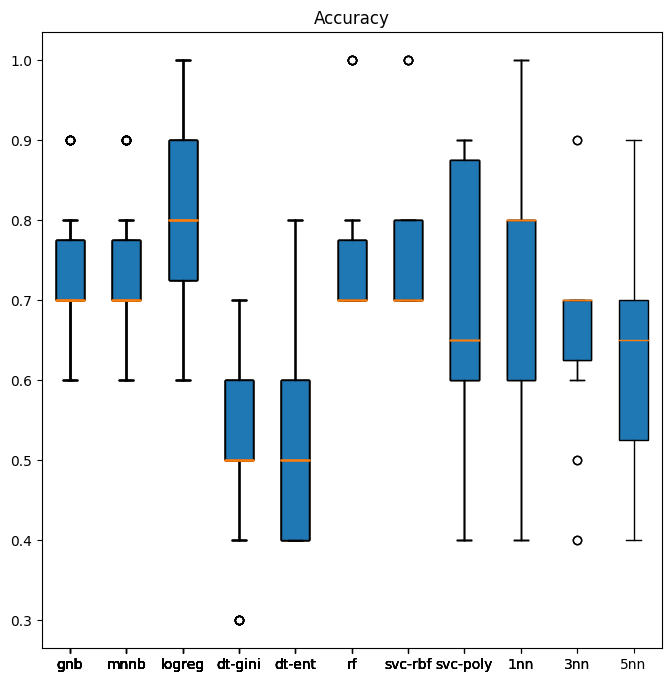

In [26]:
labels = []
data = []

for k in results:
  labels.append(k)
  data.append(results[k]['test_accuracy'])
  plt.boxplot(data, vert=True, patch_artist=True, labels=labels)
  plt.title('Accuracy')

**TODO 10.3.3**
* Obserwując wartości F1, który klasyfikator wydaje się najlepszy (dla tego zbioru danych)
* Czy 1nn jest "lepszy" niż 3nn?

- Moim zdaniem **najlepszy** wydaje się klasyfikator **logreg**.
- 1nn jest lepszy niż 3nn. Wartości są bardziej zróżnicowane jednak mediana jest znacznie wyższa.

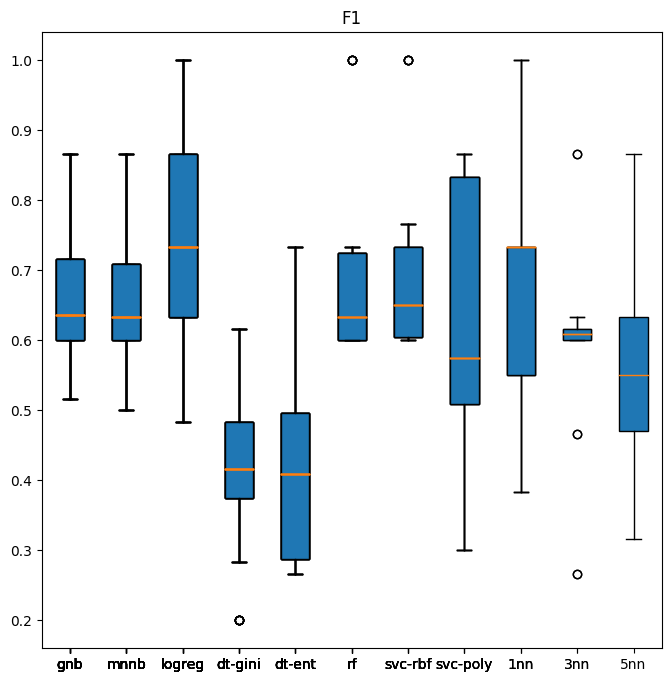

In [27]:
labels = []
data = []

for k in results:
  labels.append(k)
  data.append(results[k]['test_f1_macro'])
  plt.boxplot(data, vert=True, patch_artist=True, labels=labels)
  plt.title('F1')

## 10.4. Optymalizacja parametrów
Zakładając, że mamy zbiory parametrów $A$, $B$, $C$,...,$Z$ procedura *grid search* bada wszystkie kombinacje ze zbioru $A \times B \times C \times \dots Z$, natomiast *random search* losowo wybiera określoną liczbę kombinacji.


### 10.4.1 Grid search

Zastosujemy do regresji logistycznej. W rzeczywistości będziemy dobierali tylko jeden parameter.

In [28]:
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(configs['logreg'][0], configs['logreg'][1])
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

StandardScaler nie ma zbyt wielu parametrów, ale LogisticRegresion można dobierać stałą regularyzacji C. 

Sprawdźmy, jakie nazwy maja parametry dla pipeline...


In [29]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [30]:

C = [100, 50, 20, 10, 8, 5, 3, 2, 1, 0.8, 0.5, 0.2, 0.1, 0.05]
print(C)
params = {'logisticregression__C': C}
grid = GridSearchCV(pipeline, params, scoring="f1_macro", cv=10, verbose=0)
grid.fit(X, y)
grid.best_params_

[100, 50, 20, 10, 8, 5, 3, 2, 1, 0.8, 0.5, 0.2, 0.1, 0.05]


{'logisticregression__C': 100}

In [31]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C = grid.best_params_['logisticregression__C']))
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=1),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=1),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=1)
}
# scoring = scoring=['accuracy','f1_macro']
cv_results = cross_validate(pipeline, X, y, cv=10, scoring=scoring)

for k in cv_results:
  print(f'{k} = {cv_results[k].mean()}')

fit_time = 0.02534019947052002
score_time = 0.003513956069946289
test_accuracy = 0.8099999999999999
test_precision_macro = 0.9075
test_recall_macro = 0.8099999999999999
test_f1_macro = 0.754


### 10.4.2 Random search

Zastosujemy do SVM z kernelem RBF. 

In [32]:
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(configs['svc-rbf'][0], configs['svc-rbf'][1])
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Użyjemy klasy ```RandomizedSearchCV```.  Parametr ```n_iter``` określa, ile konfiguracji będzie testowane. Zdefiniujemy 10000 konfiguracji.

Wypróbujemy dwa parametry C oraz gamma. 

**TODO 10.4.1**
* Zdefiniuj C jako listę/wektor 100 wartości od 0 do 2
* Zdefiniuj gamma jako listę/wektor 100 wartości od 0.01 do 2 

In [33]:
C = np.linspace(0, 2, 100)
gamma = np.linspace(0.01, 2, 100)
params = {'svc__C': C, 'svc__gamma': gamma}
grid = RandomizedSearchCV(pipeline, params, scoring="f1_macro", cv=10, n_iter=100, verbose=0)
grid.fit(X, y)
grid.best_params_

{'svc__gamma': 1.7386868686868688, 'svc__C': 0.06060606060606061}

In [34]:
pipeline = make_pipeline(configs['svc-rbf'][0], SVC(kernel='rbf', C=grid.best_params_['svc__C'], gamma=grid.best_params_['svc__gamma']))
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=1),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=1),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=1)
}
cv_results = cross_validate(pipeline, X, y, cv=10, scoring=scoring)

for k in cv_results:
  print(f'{k}={cv_results[k].mean()}')

fit_time=0.0036687374114990233
score_time=0.0058326244354248045
test_accuracy=0.7100000000000001
test_precision_macro=0.8233333333333335
test_recall_macro=0.7100000000000001
test_f1_macro=0.6566666666666667
